The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


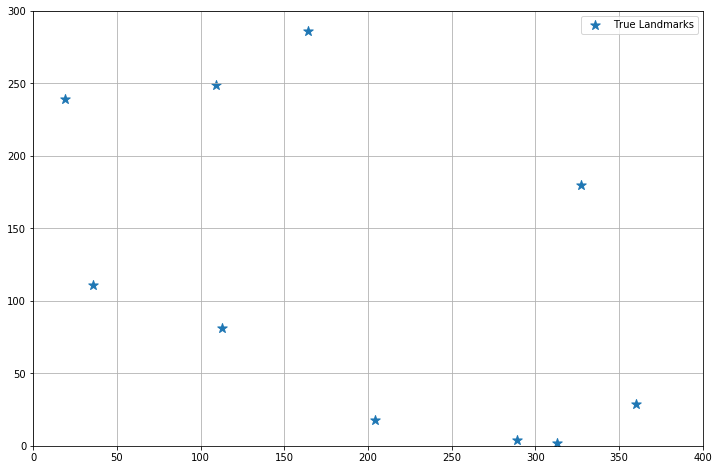

In [7]:
from data_utility.environment import *
from data_utility.utility import *
from slam_algorithms.robot import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

env = Environment(n_landmarks=10)
fig, ax = env.plot_env()

robot's initial guess of landmark: {0: [33, 247], 1: [96, 184], 2: [346, 39], 3: [33, 23], 4: [2, 15], 5: [31, 87], 6: [139, 226], 7: [307, 173], 8: [58, 234], 9: [235, 64]}
environment's landmark {0: [109, 249], 1: [313, 2], 2: [19, 239], 3: [36, 111], 4: [360, 29], 5: [113, 81], 6: [164, 286], 7: [289, 4], 8: [204, 18], 9: [327, 180]}
---
prior state:[ 70.40918446 164.9725206 ]
post state:[ 71.23435913 163.74772506]
---
prior state:[ 71.23435913 163.74772506]
post state:[ 88.34927241 126.42312597]
---
prior state:[ 88.34927241 126.42312597]
post state:[ 92.47186869 116.44856855]
---
prior state:[ 92.47186869 116.44856855]
post state:[ 94.08801902 112.06199769]
---
prior state:[ 94.08801902 112.06199769]
post state:[ 95.55699665 109.29861181]
---
prior state:[ 95.55699665 109.29861181]
post state:[ 96.2533932  107.65725287]
---
prior state:[ 96.2533932  107.65725287]
post state:[ 96.92001857 106.78096643]
---
prior state:[ 96.92001857 106.78096643]
post state:[ 97.00185067 105.8545052

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a18a303c8>)

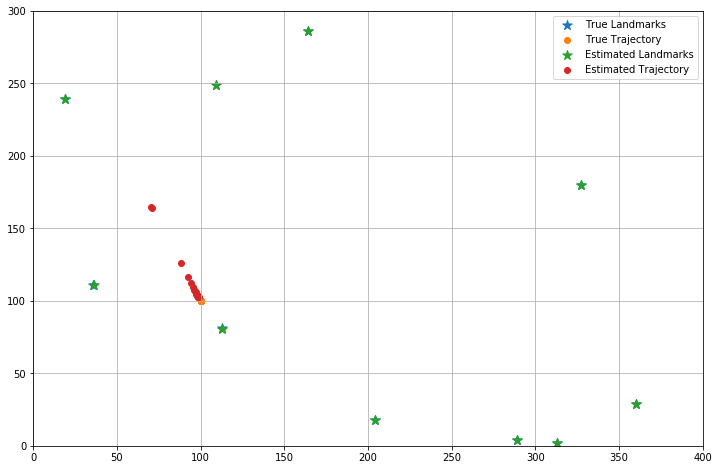

In [8]:
# Check Environment and robot's position

Q = np.array([[15., 0],[0, 15.]])
R = np.array([[10., 0],[0, 10.]])
P = np.identity(2)*5
s = np.array([100., 100.])
rob = MyRobot(env=env, Q=Q, R=R, s0=s, P0=P)
print("robot's initial guess of landmark: {}".format(rob.landmarks))
print("environment's landmark {}".format(rob.env.landmarks))
print("---")

ob = rob.observation_update(s=s)
s_prior = s + 50*np.random.randn(2)
for _ in range(20):
    s_true, s_prior = rob.time_update(s=s_prior, u=None)
    s_post = rob.map_construction(s=s_prior, ob=ob)
    ob = rob.observation_update(s=s_post)
    s_prior = s_post
    print("---")
rob.visualize()


